# Xarray and how to explore variables in the Earth System Data Cube

The aim of this exercise is to: 

* Get an introduction to Xarray
* Access the Earth System Data Cube (http://data.rsc4earth.de/) with different variables
* Find out about the metadata (which variables are stored in the cube? What is the resolution (lat, long, temporal)?)
* Plot different variables and make first analyses

---

## Introduction

[`Xarray`](https://docs.xarray.dev/en/stable/index.html) is a python module that ease the usage of labeled multi-dimensional (also known as N-dimensional) arrays built on [`NumPy`](https://numpy.org/) (which you are already familiar with). It allows fast and efficient array-computing, and provides functions for visualizations. Therefore it is very well suited to work with the Earth System Data Cube which contains a variety of climate and meteorological variables.

In Earth System Sciences, it is usually necessary to map data points in their spatial and temporal space (e.g. latitude, longitude and time). Many data formats (e.g. `zarr` or `netCDF`) allow data to be stored together with information about the dimensions and coordinates. Xarray provides two fundamental data structures to work with these data formats: DataArrays and Datasets. In the following image you can see a visual example of these structures ([source](https://docs.xarray.dev/en/stable/_images/dataset-diagram.png)): 

![](https://docs.xarray.dev/en/stable/_images/dataset-diagram.png)

- A `DataArray` contains a single multi-dimensional variable and its coordinates
- A `Dataset` holds multiple variables and (potentially) share the same coordinates.

Let's look at a practical example:





## Importing modules
At first we import the modules which we are going to use: Numpy, Xarray, fsspec and Matplotlib

In [1]:
# import modules
import numpy as np
import xarray as xr
import fsspec
import matplotlib.pyplot as plt

## Open and save the Earth System Data Cube
With the function `xr.open_zarr()` we can open the data cube and store it to the variable `ds` (short for dataset). In this specific case we additionally need the fsspec module (Filesystem interfaces for Python) to open the `zarr` file. The `zarr` format is used to store chunked and compressed, N-dimensional arrays. Other formats you may know that are used to store big data are `netCDF` or `hdf5`.

In [2]:
ds = xr.open_zarr(fsspec.get_mapper('http://data.rsc4earth.de/EarthSystemDataCube/v2.1.1/esdc-8d-0.25deg-184x90x90-2.1.1.zarr/'), \
                  consolidated=True)

Calling the variable `ds` shows us a table with information on dimensions, coordinates, data variables and attributes. You can examine the meta data of the entire dataset or even each individual variable by checking the attributes or clicking on the file icon respectively.

In [3]:
ds

<xarray.Dataset>
Dimensions:                            (time: 1840, lat: 720, lon: 1440, bnds: 2)
Coordinates:
  * lat                                (lat) float64 89.88 89.62 ... -89.88
    lat_bnds                           (lat, bnds) float64 ...
  * lon                                (lon) float64 -179.9 -179.6 ... 179.9
    lon_bnds                           (lon, bnds) float64 ...
  * time                               (time) datetime64[ns] 1979-01-05 ... 2...
    time_bnds                          (time, bnds) datetime64[ns] ...
Dimensions without coordinates: bnds
Data variables: (12/79)
    Rg                                 (time, lat, lon) float32 ...
    aerosol_optical_thickness_1600     (time, lat, lon) float64 ...
    aerosol_optical_thickness_550      (time, lat, lon) float64 ...
    aerosol_optical_thickness_670      (time, lat, lon) float64 ...
    aerosol_optical_thickness_870      (time, lat, lon) float64 ...
    air_temperature_2m                 (time, lat, lon) float32 ...
    ...                                 ...
    water_mask                         (time, lat, lon) float32 ...
    water_vapour                       (time, lat, lon) float32 ...
    white_sky_albedo                   (time, lat, lon) float32 ...
    white_sky_albedo_avhrr             (time, lat, lon) float32 ...
    xch4                               (time, lat, lon) float64 ...
    xco2                               (time, lat, lon) float64 ...
Attributes: (12/35)
    Metadata_conventions :     Unidata Dataset Discovery v1.0
    acknowledgment:            The ESDL team acknowledges all data providers! 
    chunking:                  1x720x1440
    comment:                   none. 
    contributor_name:          Max Planck Institute for Biogeochemistry
    contributor_role:          ESDL Science Lead 
    ...                        ...
    summary:                   This data set contains a data cube of Earth Sy...
    time_coverage_duration:    P40Y
    time_coverage_end:         31.12.2018
    time_coverage_resolution:  P8D
    time_coverage_start:       05.01.1979
    title:                     Earth System Data Cube

## DataArrays
The "dot" notation allows you to pull out a dataArray from the dataset, e.g.:

In [4]:
ds.air_temperature_2m

<xarray.DataArray 'air_temperature_2m' (time: 1840, lat: 720, lon: 1440)>
[1907712000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 1979-01-05 1979-01-13 ... 2018-12-31
Attributes: (12/14)
    Conventions:          CF-1.6
    comment:              Air temperature at 2m from the ERA5 reanalysis prod...
    easting:              -180 degrees
    history:              Tue Apr 14 11:03:57 2020 - ESDL data cube generation
    institution:          Brockmann Consult GmbH, Germany
    long_name:            2 metre air temperature
    ...                   ...
    source:               ESDL data cube generation, version 0.3.0.dev1
    source_attributes:    {'comment': 'Air temperature at 2m from the ERA5 re...
    time_coverage_end:    2018-12-23
    time_coverage_start:  1981-03-10
    units:                K
    url:                  https://confluence.ecmwf.int//display/CKB/ERA5+data...

In the last exercises we used the "dot" notation to apply a method on a variable (e.g., `a.capitalize()` to capitalize the string `a`, or `geospehere.append('atmosphere')` to add the item `atmosphere` to the list `geospehere`). 

The `DataArray` has four important attributes:
* `.coords` is the data container for coordinate variables
* `.dims` for the names of each axis (e.g. "lat", "lon", "time" or "x", "y", "z")
* `.attrs` contains all metadata stored in a dictionary
* `.values` is a `numpy.ndarray` that contains the values of the data array

**TODO**: What is the spatial and temporal resolution of the dataset `ds`? Which information can you find in the metadata of the DataArray `ds.air_temperature_2m`? Which time period is covered for this variable?

In [5]:
print(ds.coords)
# time 1840 split in a 8-day cycle, lat 720, lon 1440
print(ds.air_temperature_2m)
# shape, dtype, chunksize, chunktype, coordinates, attributes
# print(ds.air_temperature_2m.dropna(dim="time", how="all")) ### doesnt work anymore [28.01.2023]
# time period is covered from 1981-03-10 - 2018-12-23

Coordinates:
  * lat        (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
    lat_bnds   (lat, bnds) float64 ...
  * lon        (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    lon_bnds   (lon, bnds) float64 ...
  * time       (time) datetime64[ns] 1979-01-05 1979-01-13 ... 2018-12-31
    time_bnds  (time, bnds) datetime64[ns] ...
<xarray.DataArray 'air_temperature_2m' (time: 1840, lat: 720, lon: 1440)>
[1907712000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 1979-01-05 1979-01-13 ... 2018-12-31
Attributes: (12/14)
    Conventions:          CF-1.6
    comment:              Air temperature at 2m from the ERA5 reanalysis prod...
    easting:              -180 degrees
    history:              Tue Apr 14 11:03:57 2020 - ESDL data cube generation
    institution:          Br

### Label- or position-based indexing 

Keep in mind that the data cube comprises several gigabytes of data and running global analyses for the entire time period might be computationally extensive at this resolution. You may want to extract a subset of the dataset. Therefore, one could either use label-based indexing `.sel`, position-based indexing by `.isel` ((integer) select) or slicing of the dataArray:

In [6]:
# Select all data from the variable gross_primary_productivity from May 2000
ds.gross_primary_productivity.sel(time='2000-05')

<xarray.DataArray 'gross_primary_productivity' (time: 4, lat: 720, lon: 1440)>
[4147200 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2000-05-04 2000-05-12 2000-05-20 2000-05-28
Attributes: (12/15)
    Conventions:          CF-1.6
    comment:              Gross Carbon uptake of of the ecosystem through pho...
    easting:              -180 degrees
    history:              Tue Apr 14 11:14:15 2020 - ESDL data cube generation
    institution:          Brockmann Consult GmbH, Germany
    long_name:            Gross Primary Productivity
    ...                   ...
    source_attributes:    {'comment': 'Gross Carbon uptake of of the ecosyste...
    standard_name:        gross_primary_productivity_of_carbon
    time_coverage_end:    2018-12-23
    time_coverage_start:  2001-01-05
    units:                gC m-2 day-1
    url:                  http://www.fluxcom.org/

In [7]:
# Select the air_temperature_2m array at time 1001 (which is in this case 2000-10-03)
ds.air_temperature_2m.isel(time=1000)

<xarray.DataArray 'air_temperature_2m' (lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    time     datetime64[ns] 2000-10-03
Attributes: (12/14)
    Conventions:          CF-1.6
    comment:              Air temperature at 2m from the ERA5 reanalysis prod...
    easting:              -180 degrees
    history:              Tue Apr 14 11:03:57 2020 - ESDL data cube generation
    institution:          Brockmann Consult GmbH, Germany
    long_name:            2 metre air temperature
    ...                   ...
    source:               ESDL data cube generation, version 0.3.0.dev1
    source_attributes:    {'comment': 'Air temperature at 2m from the ERA5 re...
    time_coverage_end:    2018-12-23
    time_coverage_start:  1981-03-10
    units:                K
    url:                  https://confluence.ecmwf.int//display/CKB/ERA5+data...

### Slicing
It is possible to slice the dataArray by applying the `slice()` function to it, that takes the start and end value of the corresponding dimension, i.e. `slice(start, end)`, and only consideres the chosen time period. It is also possible to choose on a spatial area. 

In [8]:
ds.min_air_temperature_2m.sel(time=slice("2013-05", "2013-07"))

<xarray.DataArray 'min_air_temperature_2m' (time: 11, lat: 720, lon: 1440)>
[11404800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2013-05-05 2013-05-13 ... 2013-07-24
Attributes: (12/14)
    Conventions:          CF-1.6
    comment:              Air temperature at 2m from the ERA5 reanalysis prod...
    easting:              -180 degrees
    history:              Tue Apr 14 11:06:00 2020 - ESDL data cube generation
    institution:          Brockmann Consult GmbH, Germany
    long_name:            Minimum 2 metre air temperature
    ...                   ...
    source:               ESDL data cube generation, version 0.3.0.dev1
    source_attributes:    {'comment': 'Air temperature at 2m from the ERA5 re...
    time_coverage_end:    2018-12-23
    time_coverage_start:  1981-03-10
    units:                K
    url:                  https://confluence.ecmwf.int//display/CKB/ERA5+data...

## Plotting different variables

With the `.plot()` function, it is easy to visualize the selected data. Since all meta data are stored along the data, the labeling is done automatically without setting title, x- and y-axis or the legend manually.  

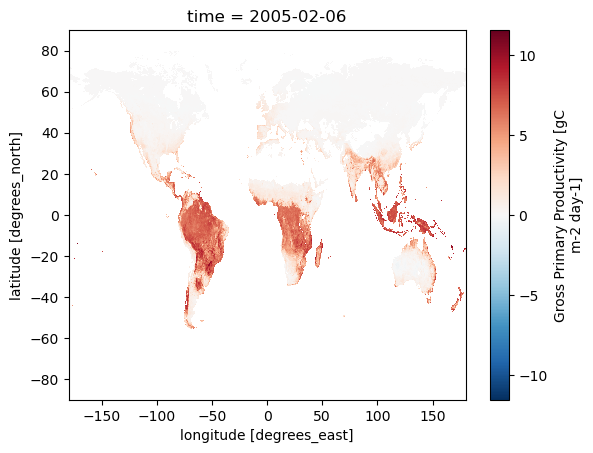

In [9]:
ds.gross_primary_productivity.isel(time=1200).plot()

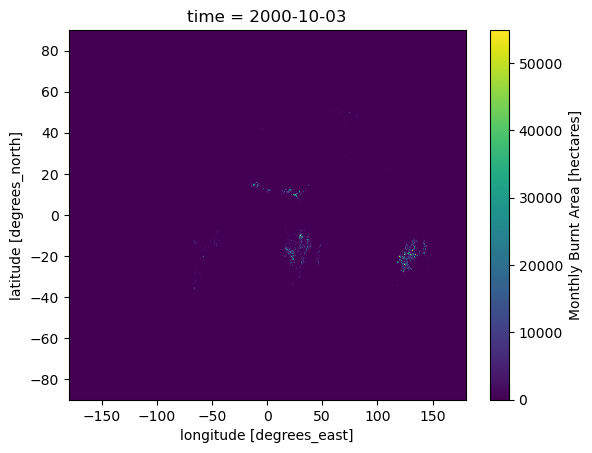

In [10]:
ds.burnt_area.isel(time=1000).plot()

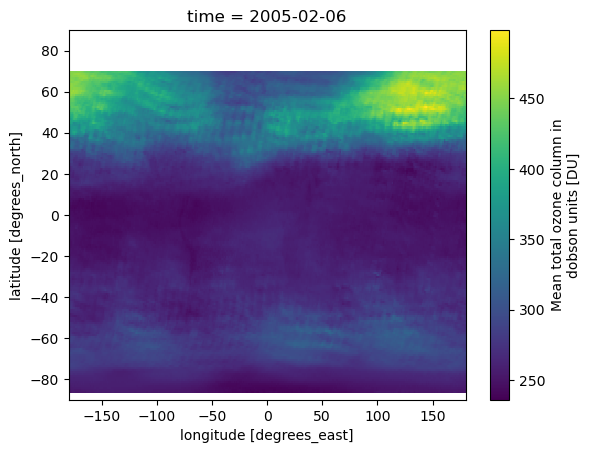

In [11]:
ds.ozone.isel(time=1200).plot()

**TODO**: Play around with this function and plot maps of different variables. You can compare changes of one variables at different times.

If the data contains unwanted outliers, visualisation could be improved by adding the parameter `robust=True` inside the `plot()` function. This will use the 2nd and 98th percentiles of the data to compute the color limits.

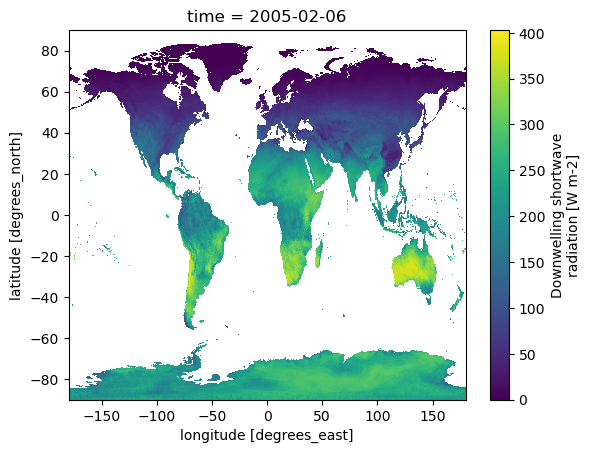

In [12]:
ds.Rg.isel(time=1200).plot()

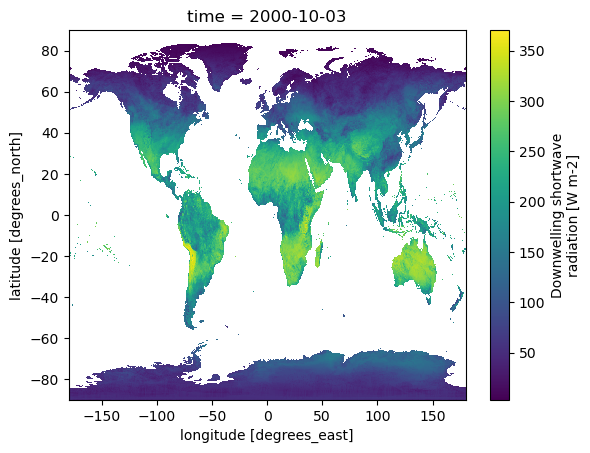

In [13]:
ds.Rg.isel(time=1000).plot()

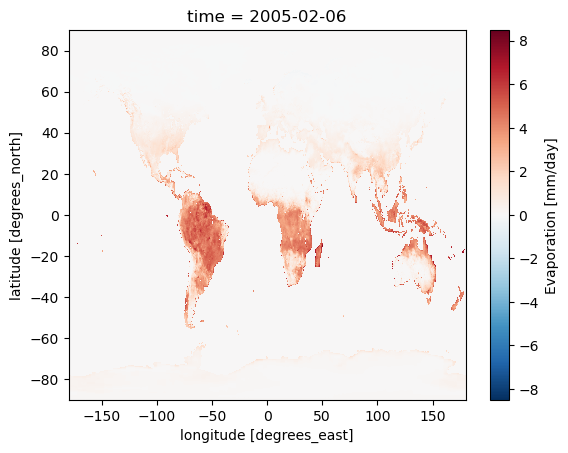

In [14]:
ds.evaporation.isel(time=1200).plot()

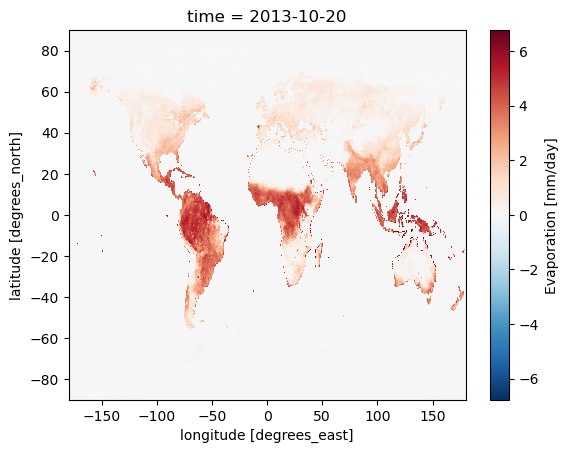

In [15]:
ds.evaporation.isel(time=1600).plot()

## Analysis: How does the albedo change over the course of the year?

We would like to know how the gross primary productivity changes over the course of the year. Therefore we select one year from the dataArray (e.g. 2007). We would like to calculate the mean value for each month. This can be done easily by applying `.groupby('time.month')`, followed by the `.mean()` function. Instead of `time.month` also `time.year` or `time.season` could be chosen. 

In [16]:
albedo_2007 = ds.black_sky_albedo_avhrr.sel(time='2007').groupby('time.month').mean()

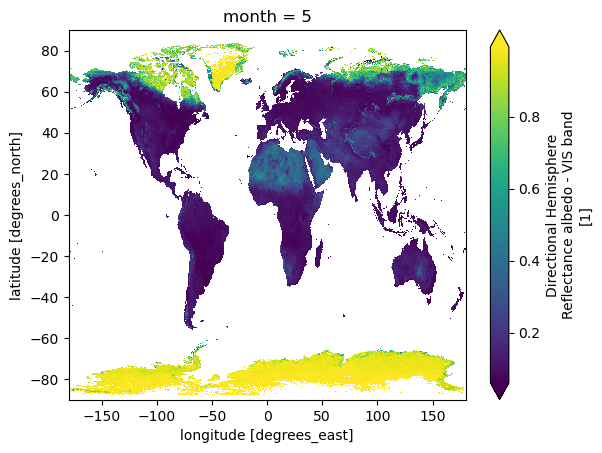

In [17]:
albedo_2007.sel(month=5).plot(robust=True)

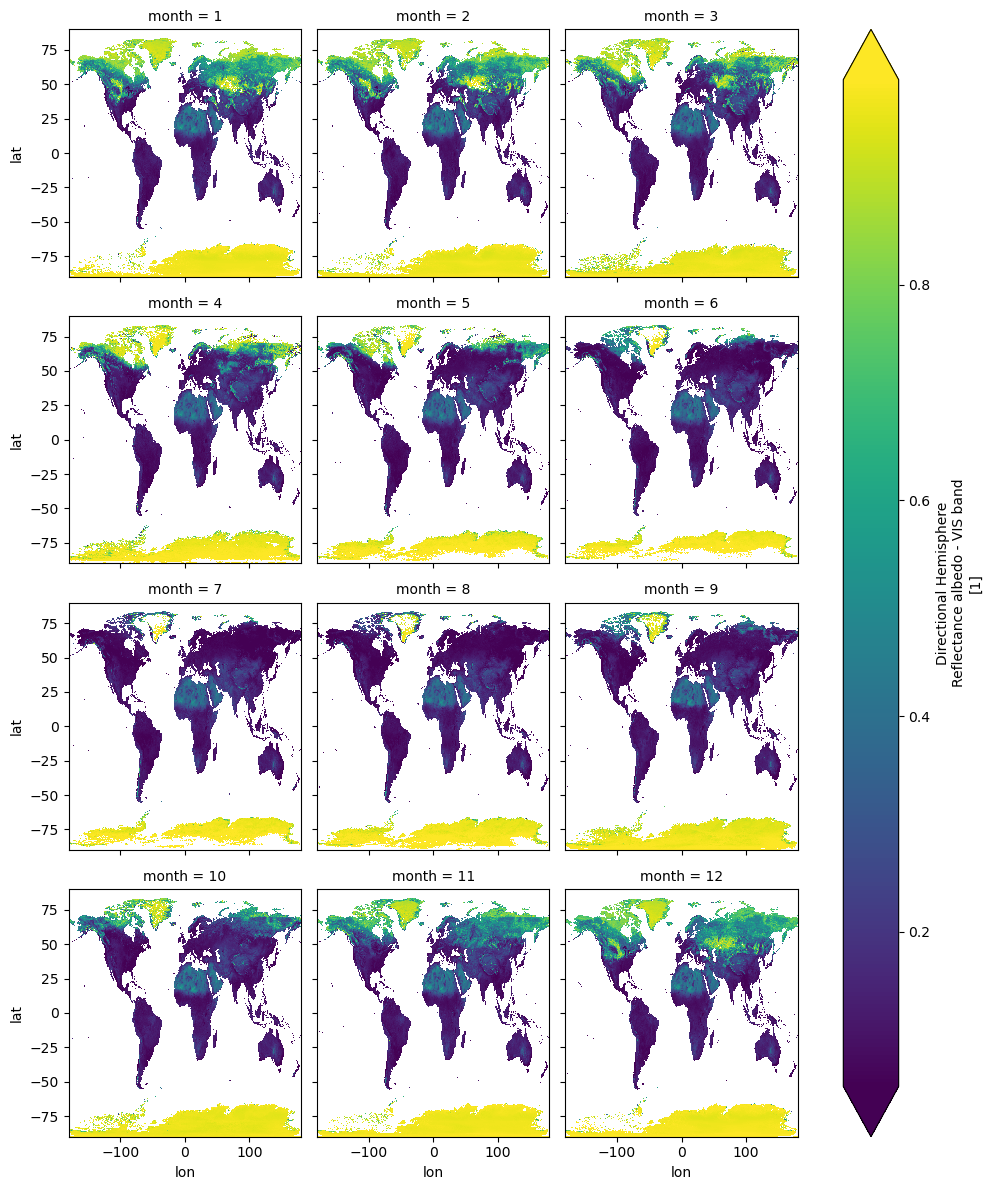

In [18]:
albedo_2007.plot(col='month', col_wrap=3, robust=True)

**TODO**: Team up with the person sitting next to you and select a variable of your interest. Can you reproduce the analysis for your variable? 

In [19]:
ozone_2007 = ds.ozone.sel(time='2007').groupby('time.month').mean()

In [20]:
ozone_2007

<xarray.DataArray 'ozone' (month: 12, lat: 720, lon: 1440)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [268.44385, 268.44385, 268.44385, ..., 268.43622, 268.43622,
         268.43622],
        [268.44385, 268.44385, 268.44385, ..., 268.43622, 268.43622,
         268.43622],
        [268.44385, 268.44385, 268.44385, ..., 268.43622, 268.43622,
         268.43622]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [187.46494, 187.46494, 187.46494, ..., 187.57007, 187.57007,
         187.57007],
        [187.46494, 187.46494, 187.46494, ..., 187.57007, 187.57007,
         187.57007],
        [187.46494, 187.46494, 187.46494, ..., 187.57007, 187.57007,
         187.57007]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [238.02951, 238.02951, 238.02951, ..., 237.94907, 237.94907,
         237.94907],
        [238.02951, 238.02951, 238.02951, ..., 237.94907, 237.94907,
         237.94907],
        [238.02951, 238.02951, 238.02951, ..., 237.94907, 237.94907,
         237.94907]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes: (12/13)
    ID:                        72
    comment:                   Atmospheric ozone based on the Ozone CCI data.
    esa_cci_path:              /neodc/esacci/ozone/data/total_columns/l3/merg...
    long_name:                 Mean total ozone column in dobson units
    orig_attrs:                {'comment': 'Atmospheric ozone based on the Oz...
    orig_version:              v0100
    ...                        ...
    standard_name:             atmosphere_mole_content_of_ozone
    time_coverage_end:         2011-06-30
    time_coverage_resolution:  P8D
    time_coverage_start:       1996-03-09
    units:                     DU
    url:                       http://www.esa-ozone-cci.org/

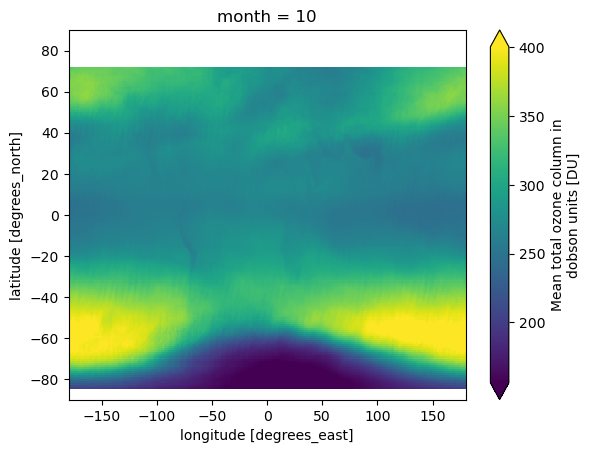

In [21]:
ozone_2007.sel(month=10).plot(robust=True)

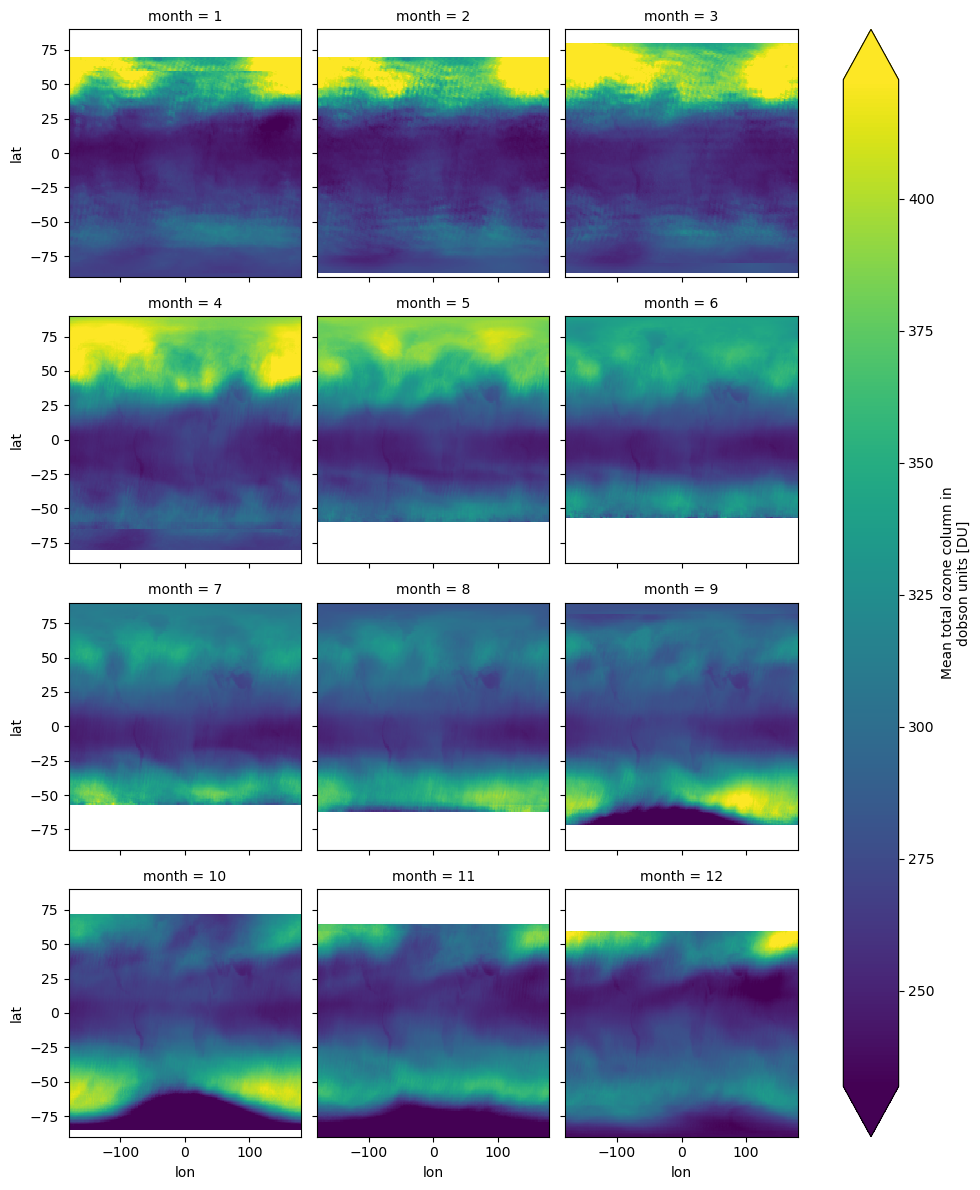

In [22]:
ozone_2007.plot(col='month', col_wrap=3, robust=True)

**TODO** Additional task: Think about the grid cells. When you plot them, they are all equal in size. What happens if we calculate the e.g. the global mean temperature or mean albedo based on this data? How could it be improved?

**Answer** If you calculate the global mean temperature or mean albedo based on grid cells that are all equal in size, it may not accurately represent the actual distribution of temperature or albedo across the Earth. This is because the Earth's surface is not uniform and certain areas may have vastly different temperature or albedo values.

One way to improve this would be to weight the grid cells based on their area. For example, if a grid cell represents a larger area of the Earth's surface, it should have more weight in the calculation of the global mean temperature or albedo.

## Additional material
Find additional information on the Xarray documentation page. There are also [tutorials](https://tutorial.xarray.dev/overview/xarray-in-45-min.html) and a [user guide](https://docs.xarray.dev/en/stable/user-guide/index.html) on e.g. the [terminology](https://docs.xarray.dev/en/stable/user-guide/terminology.html) or [plotting](https://docs.xarray.dev/en/stable/user-guide/plotting.html).